## Local Real Estate

In [1]:
# Dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from pathlib import Path

In [2]:
# file path
p = Path.cwd()
p1 = f'{p}/Comp_Crunch_Files/Aug24_Starter_Homes'
p2 = f'{p1}/Aug24_starter_'

In [3]:
p2

'/Users/cherifarkam/Desktop/Data_Science/Projects/Repositories/Local_Real_Estate_Analysis/Comp_Crunch_Files/Aug24_Starter_Homes/Aug24_starter_'

In [4]:
# Enter zip codes into list
zipcodes = [91301, 91320, 91360, 91361, 91362, 91377]

In [5]:
# Create a list of dataframes from csv files in repository
df_list = []
for i in range(len(zipcodes)):
    df = pd.read_csv(f'{p2}{zipcodes[i]}.csv')
    df_list.append(df)

df_list[0].head(2)

,address,zipCode,city,state,price,bed,bath,sqft,pricePerSf,lotArea,lotAreaType,dateSold,dateSoldNumeric,zillowUrl,latitude,longitude,homeType,zestimate,rentZestimate,imageUrl
0,"3823 Cottonwood Grove Trl, Calabasas, CA 91301",91301,Calabasas,CA,1315000,3,2.0,1355,970.48,8958.0,sqft,8/29/2024,1724914800000,https://zillow.com/homedetails/3823-Cottonwood...,34.130390,-118.709940,SINGLE_FAMILY,1315000.0,4986,https://photos.zillowstatic.com/fp/4fac927a6e5...
1,"29727 Canwood St, Agoura Hills, CA 91301",91301,Agoura Hills,CA,740000,3,3.0,1749,423.10,1121.0,sqft,8/27/2024,1724742000000,https://zillow.com/homedetails/29727-Canwood-S...,34.148308,-118.773674,TOWNHOUSE,739700.0,4308,https://photos.zillowstatic.com/fp/8de34baabc3...


In [6]:
# create union style joins for the list of dataframes
re_df = pd.concat(df_list)

re_df.shape

(1413, 20)

In [7]:
pd.set_option('max_colwidth', 100)

In [8]:
# Explore
re_df.loc[:, ~re_df.columns.isin(['zipCode', 'dateSoldNumeric', 'latitude', 'longitude'])].describe() 
# OR 'dateSoldNumeric' OR 'latitude' OR 'longitude'].describe()

,price,bed,bath,sqft,pricePerSf,lotArea,zestimate,rentZestimate
count,1.413000e+03,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1.378000e+03,1413.000000
mean,8.114481e+05,3.013447,2.182944,1426.234961,573.228719,4961.163149,9.176498e+05,4121.100495
std,2.385105e+05,0.615398,0.510484,226.649106,154.080395,3303.199620,2.060976e+05,627.141681
min,5.000000e+02,1.000000,1.000000,755.000000,0.380000,0.250000,4.009000e+05,1783.000000
25%,7.000000e+05,3.000000,2.000000,1280.000000,503.470000,1710.000000,7.865250e+05,3740.000000
50%,8.175000e+05,3.000000,2.000000,1450.000000,571.930000,5213.000000,9.061000e+05,4096.000000
75%,9.300000e+05,3.000000,2.000000,1625.000000,649.790000,7741.000000,1.015525e+06,4426.000000
max,2.075000e+06,5.000000,4.000000,1750.000000,1421.610000,10875.000000,2.087500e+06,7022.000000


In [9]:
# Limit to homes less than 1400 sq ft with at least 2 bedrooms
re_df = re_df[re_df['sqft'] < 1400]

re_df.shape

(583, 20)

In [10]:
re_df.describe()

,zipCode,price,bed,bath,sqft,pricePerSf,lotArea,dateSoldNumeric,latitude,longitude,zestimate,rentZestimate
count,583.000000,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,583.000000,583.000000,5.700000e+02,583.000000
mean,91345.332762,7.168015e+05,2.722127,2.006003,1200.303602,599.950892,4725.925253,1.673910e+12,34.182664,-118.866854,8.041937e+05,3706.756432
std,22.941036,1.924324e+05,0.610595,0.518107,150.574143,153.784306,3176.691857,2.941242e+10,0.023285,0.058303,1.672122e+05,458.056243
min,91301.000000,5.000000e+02,1.000000,1.000000,755.000000,0.380000,0.250000,1.630998e+12,34.103786,-118.977646,4.009000e+05,2167.000000
25%,91320.000000,6.157500e+05,2.000000,2.000000,1138.000000,522.390000,1930.500000,1.648710e+12,34.165672,-118.909385,6.844500e+05,3400.500000
50%,91360.000000,7.250000e+05,3.000000,2.000000,1234.000000,599.560000,4356.000000,1.669709e+12,34.181423,-118.864190,8.033000e+05,3690.000000
75%,91361.000000,8.250000e+05,3.000000,2.000000,1318.500000,675.825000,7231.500000,1.699949e+12,34.206575,-118.834520,9.045000e+05,3948.500000
max,91377.000000,1.750000e+06,5.000000,3.000000,1398.000000,1421.610000,10875.000000,1.725433e+12,34.233402,-118.708470,1.901000e+06,5390.000000


In [11]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 123
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          583 non-null    object 
 1   zipCode          583 non-null    int64  
 2   city             583 non-null    object 
 3   state            583 non-null    object 
 4   price            583 non-null    int64  
 5   bed              583 non-null    int64  
 6   bath             583 non-null    float64
 7   sqft             583 non-null    int64  
 8   pricePerSf       583 non-null    float64
 9   lotArea          583 non-null    float64
 10  lotAreaType      583 non-null    object 
 11  dateSold         583 non-null    object 
 12  dateSoldNumeric  583 non-null    int64  
 13  zillowUrl        583 non-null    object 
 14  latitude         583 non-null    float64
 15  longitude        583 non-null    float64
 16  homeType         583 non-null    object 
 17  zestimate        570 

In [12]:
re_df[['dateSold', 'dateSoldNumeric']].sort_values('dateSold').head()

,dateSold,dateSoldNumeric
158,1/10/2023,1673337600000
200,1/11/2022,1641888000000
315,1/11/2022,1641888000000
51,1/11/2024,1704960000000
50,1/11/2024,1704960000000


In [13]:
re_df['dateSold'] = pd.to_datetime(re_df['dateSold'], format="%m/%d/%Y")

re_df[['dateSold','dateSoldNumeric']].sort_values('dateSold').head()

,dateSold,dateSoldNumeric
402,2021-09-07,1630998000000
138,2021-09-08,1631084400000
235,2021-09-09,1631170800000
136,2021-09-09,1631170800000
400,2021-09-09,1631170800000


In [14]:
re_df['city'].unique()

array(['Calabasas', 'Agoura Hills', 'Thousand Oaks', 'Newbury Park',
       'Westlake Village', 'Oak Park'], dtype=object)

In [45]:
sns.boxplot(data = re_df[['price', 'city']], x='price', y='city')


<Axes: xlabel='price', ylabel='city'>

<Axes: xlabel='price', ylabel='city'>

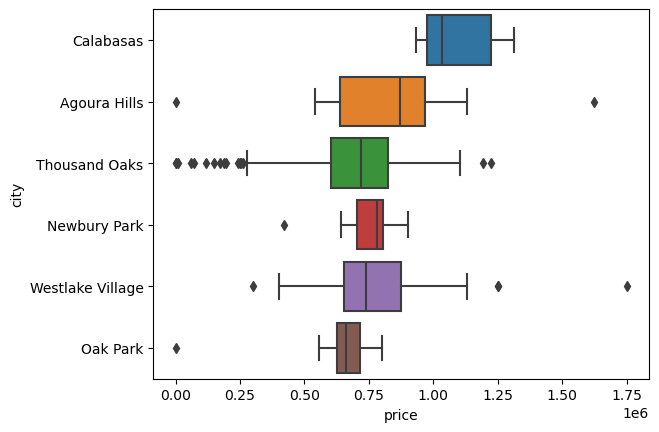

In [18]:
sns.boxplot(re_df, x='price', y='city')



In [28]:
pd.set_option('display.max_rows', 100)


re_df = re_df[re_df['price']>250000]
re_df = re_df[re_df['price']<1250000]
re_df.shape

(563, 20)

<Axes: xlabel='price', ylabel='city'>

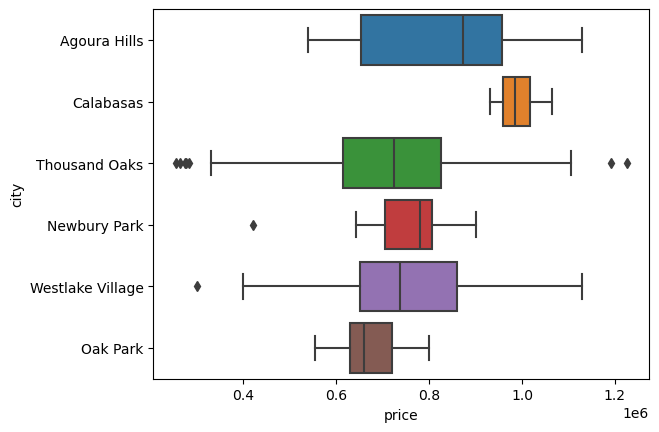

In [29]:
sns.boxplot(re_df, x='price', y='city')

In [33]:
re_df.groupby('city')['city'].count()

city
Agoura Hills         28
Calabasas             4
Newbury Park          7
Oak Park             39
Thousand Oaks       427
Westlake Village     58
Name: city, dtype: int64

/opt/anaconda3/envs/dev3_10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

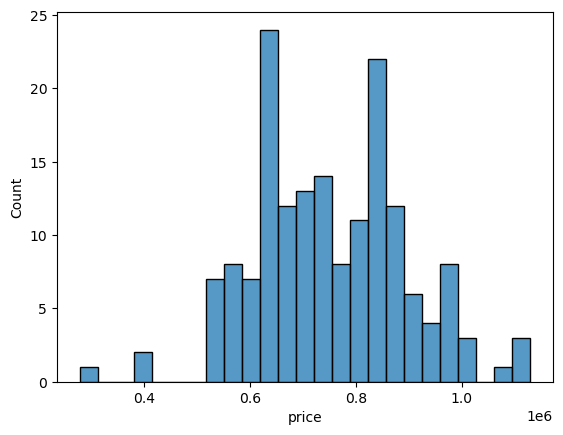

In [38]:
sns.histplot(re_df['price'][re_df['dateSold']>'2023-09-05'], bins=25)

In [40]:
re_df[re_df['dateSold']>'2023-09-05']

,address,zipCode,city,state,price,bed,bath,sqft,pricePerSf,lotArea,lotAreaType,dateSold,dateSoldNumeric,zillowUrl,latitude,longitude,homeType,zestimate,rentZestimate,imageUrl
7,"5429 Fairview Pl, Agoura Hills, CA 91301",91301,Agoura Hills,CA,1130000,2,1.0,880,1284.09,0.588361,acres,2024-07-11,1720681200000,https://zillow.com/homedetails/5429-Fairview-Pl-Agoura-Hills-CA-91301/19888787_zpid/,34.148880,-118.742370,SINGLE_FAMILY,1133500.0,3330,https://photos.zillowstatic.com/fp/ea96f246d3d49784879e16604572bbdb-p_e.jpg
11,"5666 Slicers Cir, Agoura Hills, CA 91301",91301,Agoura Hills,CA,910000,3,2.0,1218,747.13,3567.000000,sqft,2024-06-07,1717743600000,https://zillow.com/homedetails/5666-Slicers-Cir-Agoura-Hills-CA-91301/19888003_zpid/,34.154022,-118.790260,SINGLE_FAMILY,913200.0,4205,https://photos.zillowstatic.com/fp/8db0d9fb376dbd7a19b9e6a7ed0e4322-p_e.jpg
15,"5765 Lake Lindero Dr, Agoura Hills, CA 91301",91301,Agoura Hills,CA,995000,3,3.0,1320,753.79,4187.000000,sqft,2024-04-29,1714374000000,https://zillow.com/homedetails/5765-Lake-Lindero-Dr-Agoura-Hills-CA-91301/19889270_zpid/,34.156647,-118.789030,SINGLE_FAMILY,999400.0,4602,https://photos.zillowstatic.com/fp/cd1fefc524ef7e5e12ce653d569445b4-p_e.jpg
20,"26825 Cactus Trl, Calabasas, CA 91301",91301,Calabasas,CA,1065000,3,2.0,1355,785.98,4165.000000,sqft,2024-03-28,1711609200000,https://zillow.com/homedetails/26825-Cactus-Trl-Calabasas-CA-91301/19894261_zpid/,34.132225,-118.709250,SINGLE_FAMILY,1072300.0,4883,https://photos.zillowstatic.com/fp/814b933c74aea0af1b1e4353664662b1-p_e.jpg
22,"30541 Canwood St, Agoura Hills, CA 91301",91301,Agoura Hills,CA,560000,3,2.0,1038,539.50,1038.000000,sqft,2024-03-15,1710486000000,https://zillow.com/homedetails/30541-Canwood-St-Agoura-Hills-CA-91301/19887676_zpid/,34.147293,-118.786354,TOWNHOUSE,564500.0,3617,https://photos.zillowstatic.com/fp/21e13d87aae938da6c8dd9d9acbf1590-p_e.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,"1003 Thistlegate Rd, Oak Park, CA 91377",91377,Oak Park,CA,760000,2,2.0,1146,663.18,2524.000000,sqft,2024-02-28,1709107200000,https://zillow.com/homedetails/1003-Thistlegate-Rd-Oak-Park-CA-91377/16495989_zpid/,34.183000,-118.761080,TOWNHOUSE,773100.0,3550,https://photos.zillowstatic.com/fp/60431636e2712113be7d79d15b8da22a-p_e.jpg
27,"5785 Oak Bank Trl UNIT 105, Oak Park, CA 91377",91377,Oak Park,CA,625000,2,3.0,1244,502.41,1244.000000,sqft,2024-01-08,1704700800000,https://zillow.com/homedetails/5785-Oak-Bank-Trl-UNIT-105-Oak-Park-CA-91377/16496810_zpid/,34.182700,-118.766365,TOWNHOUSE,643300.0,3676,https://photos.zillowstatic.com/fp/1c7dca4df435fd309b2d28a705cf0e61-p_e.jpg
28,"4771 Via Bensa, Oak Park, CA 91377",91377,Oak Park,CA,729900,2,3.0,1240,588.63,1241.460000,sqft,2023-12-28,1703750400000,https://zillow.com/homedetails/4771-Via-Bensa-Oak-Park-CA-91377/16486770_zpid/,34.177696,-118.786680,TOWNHOUSE,753100.0,3450,https://photos.zillowstatic.com/fp/defcbadaef717d2866839dad6afe1546-p_e.jpg
29,"4790 Gondola Dr, Oak Park, CA 91377",91377,Oak Park,CA,715000,2,3.0,1240,576.61,1240.000000,sqft,2023-12-21,1703145600000,https://zillow.com/homedetails/4790-Gondola-Dr-Oak-Park-CA-91377/16486757_zpid/,34.176780,-118.786420,TOWNHOUSE,738900.0,3450,https://photos.zillowstatic.com/fp/54589b5fecd62c8210a163173833fbcc-p_e.jpg


In [41]:
re_df_recent = re_df[re_df['dateSold']>'2023-09-05']

<Axes: xlabel='pricePerSf'>

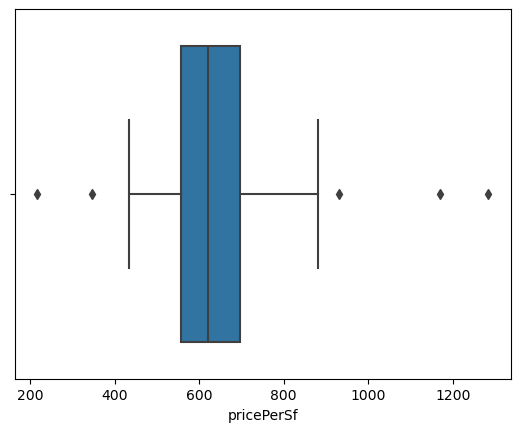

In [47]:
sns.boxplot(re_df_recent, x='pricePerSf', whis=1.5)

In [49]:
# Find the range of values that encompasses 85% of the values
# for i in range(10):
#     print(np.quantile(a=re_df_recent['pricePerSf'],q=i*.1))
range_list = [.075, .925]
for i in range_list:
    print(np.quantile(a=re_df_recent['pricePerSf'],q=i))

503.5075
787.895


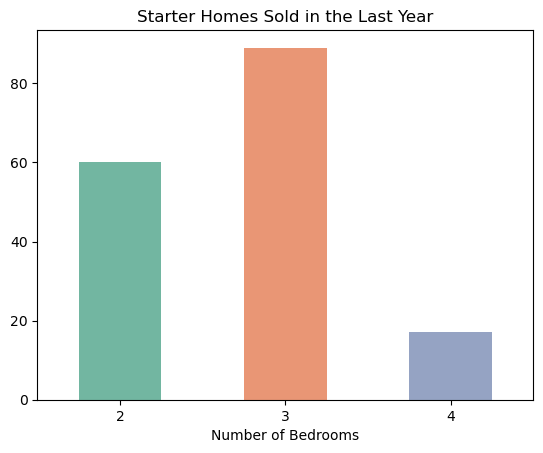

In [74]:
bed_count = re_df_recent.groupby('bed').count().reset_index()

bed_count = bed_count[['bed', 'address']]
bed_count.columns = ['#beds', 'count']

ax = sns.barplot(data=bed_count, x='#beds', y='count', width=.5, palette='Set2')
ax.set_title('Starter Homes Sold in the Last Year')
ax.set_ylabel('')
ax.set_xlabel('Number of Bedrooms')

plt.pyplot.savefig('Images/starterhomessold_beds.svg', format='svg')